In [1]:
# https://github.com/johanna23cct/integrated-CA2-MSc-2023094.git

In [2]:
#git remote add origin https://github.com/johanna23cct/integrated-CA2-MSc-2023094.git
#git branch -M main
#git push -u origin main

In [3]:
pip install pyspark

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install Matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install bokeh

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install skforecast --user

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install Tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
# Data manipulation
# ==============================================================================
import numpy as np
from numpy import loadtxt
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords
from nltk import download

from textblob import TextBlob
from datetime import datetime
#from statsmodels.tsa.arima.model import ARIMA


# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
#from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load


[nltk_data] Downloading package punkt to /home/hduser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/hduser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#create Spark session
#appName = "Sentiment Analysis in Spark"
#spark = SparkSession \
#    .builder \
#    .appName(appName) \
#    .config("spark.some.config.option", "some-value") \
#    .getOrCreate()

In [13]:
#from keras.layers import Dense 
#from keras.models import Sequential

In [14]:

# Spark
# import SparkSession library 
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.functions import udf, col, min, max, lower, concat_ws, regexp_replace
from pyspark.sql.functions import to_date, split, size, length, broadcast, sum
from pyspark.sql.functions import to_timestamp, concat, lit, substring, when, month
from pyspark.sql.types import DoubleType, StructType, StructField, ArrayType
from pyspark.sql.types import StringType, IntegerType, TimestampType
from pyspark.sql.types import *
from pyspark.ml.feature import StopWordsRemover, VectorAssembler
from pyspark.ml.linalg import Vectors
from pyspark.ml.regression import LinearRegression
import pyspark.sql.types as typ
import pyspark.sql.functions as fn
import pyspark.sql.functions as F

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

In [15]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [16]:
# SparkContext 
sc.master

'local[*]'

In [17]:
# Creating a SparkSession  **from tutorial 4 - NN using Pyspark

In [18]:
spark = SparkSession.builder.appName("MySparkApplication").getOrCreate()

In [19]:
schema = StructType([
    StructField("Ids", IntegerType(), True),
    StructField("Date", StringType(), True),
    StructField("Flag", StringType(), True),
    StructField("User", StringType(), True),
    StructField("Text", StringType(), True)
])

In [20]:
# ****************************************************************************************************************
# *                                  Start with the Data                                                         *
# ****************************************************************************************************************

In [21]:
# Big headache and colapse, to read the dataset
# I was load the file from my hadoop (local)
#spark_df = spark.read.csv("file:///home/hduser/Documents/CA2/ProjectTweets.csv", header=True, inferSchema = True)

In [22]:
#Move the dataset fiel to HDFS path from my terminal:
#First check:  $fs -ls/user1  from /home/hduser/Documents/CA2/
#Next move :   $hadoop fs-put./ProjectTweets.scv/user1
#Check again : $fs -ls/user1
#I will use direct from the path, to have one of five V' (Velocity) 


#folowiong you can see the two way to load the dataset, 
#    (command)+(file://)+(/path/)+(filename)
#I will use direct from the path, to have one of five V' (Velocity) 

#Tweets_path = "/user1/ProjectTweets.csv"
#df = spark.read.csv("file:///home/hduser/Documents/CA2/ProjectTweets.csv", header=True, inferSchema = True)

In [23]:
spark_df = spark.read.csv("/user1/ProjectTweets.csv", header=False, inferSchema=True)

In [24]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: long (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)



In [25]:
column_names = ['_c0', 'Ids', 'Date', 'Flag', 'User', 'Text']

In [26]:
for i, column_name in enumerate(column_names):
    spark_df = spark_df.withColumnRenamed("_c" + str(i),column_name)

In [27]:
#Showing the data
spark_df.show()

+---+----------+--------------------+--------+---------------+--------------------+
|_c0|       Ids|                Date|    Flag|           User|                Text|
+---+----------+--------------------+--------+---------------+--------------------+
|  0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|  1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|  2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|  3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|  4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
|  5|1467811372|Mon Apr 06 22:20:...|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|  6|1467811592|Mon Apr 06 22:20:...|NO_QUERY|        mybirch|         Need a hug |
|  7|1467811594|Mon Apr 06 22:20:...|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|  8|1467811795|Mon Apr 06 22:20:...|NO_QUERY|2Hood4Hollywood|@Tatiana_K nop

In [28]:
# display the total number of rows data
total_rows = spark_df.count()


In [29]:
formatted_total_rows = "{:,}".format(total_rows)
print("Total Rows:", formatted_total_rows)

Total Rows: 1,600,000


In [30]:
# Drop unnecessary column  ************************************************************

In [31]:
column_to_drop = ['Flag', 'Unnamed: 0']


In [32]:
spark_df = spark_df.drop('Flag')

In [33]:
spark_df.show()

+---+----------+--------------------+---------------+--------------------+
|_c0|       Ids|                Date|           User|                Text|
+---+----------+--------------------+---------------+--------------------+
|  0|1467810369|Mon Apr 06 22:19:...|_TheSpecialOne_|@switchfoot http:...|
|  1|1467810672|Mon Apr 06 22:19:...|  scotthamilton|is upset that he ...|
|  2|1467810917|Mon Apr 06 22:19:...|       mattycus|@Kenichan I dived...|
|  3|1467811184|Mon Apr 06 22:19:...|        ElleCTF|my whole body fee...|
|  4|1467811193|Mon Apr 06 22:19:...|         Karoli|@nationwideclass ...|
|  5|1467811372|Mon Apr 06 22:20:...|       joy_wolf|@Kwesidei not the...|
|  6|1467811592|Mon Apr 06 22:20:...|        mybirch|         Need a hug |
|  7|1467811594|Mon Apr 06 22:20:...|           coZZ|@LOLTrish hey  lo...|
|  8|1467811795|Mon Apr 06 22:20:...|2Hood4Hollywood|@Tatiana_K nope t...|
|  9|1467812025|Mon Apr 06 22:20:...|        mimismo|@twittera que me ...|
| 10|1467812416|Mon Apr 0

In [34]:
# Creating a UDF to apply VADER sentiment analysis to a Text column

In [35]:
schema = (
    StructType()
    .add("_c0","integer")
    .add("Ids","integer")
    .add("Date","string")
    .add("Flag", "string")
    .add("User","string")
    .add("Text", "string")
)

In [36]:
def analyze_sentiment(Text):
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(Text)
    return sentiment['compound']

In [37]:
#register the UDF

In [38]:
#sentiment_udf = udf(lambda text:spark_df("Text"), StringType()) 
sentiment_udf = udf(analyze_sentiment, StringType())

In [39]:
#Apply sentiment

In [40]:
spark_df = spark_df.withColumn("analyze_sentiment", sentiment_udf(spark_df["Text"]))

In [41]:
#print(analyze_sentiment.show())

In [42]:
spark_df.select("Text", "analyze_sentiment").show()

+--------------------+-----------------+
|                Text|analyze_sentiment|
+--------------------+-----------------+
|@switchfoot http:...|          -0.0173|
|is upset that he ...|            -0.75|
|@Kenichan I dived...|           0.4939|
|my whole body fee...|            -0.25|
|@nationwideclass ...|          -0.6597|
|@Kwesidei not the...|              0.0|
|         Need a hug |           0.4767|
|@LOLTrish hey  lo...|            0.745|
|@Tatiana_K nope t...|              0.0|
|@twittera que me ...|              0.0|
|spring break in p...|              0.0|
|I just re-pierced...|              0.0|
|@caregiving I cou...|          -0.5994|
|@octolinz16 It it...|          -0.1027|
|@smarrison i woul...|           0.3724|
|@iamjazzyfizzle I...|           0.4545|
|Hollis' death sce...|          -0.9081|
|about to file taxes |              0.0|
|@LettyA ahh ive a...|           0.6988|
|@FakerPattyPattz ...|           0.1779|
+--------------------+-----------------+
only showing top

2023-11-15 21:30:59,028 WARN python.PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 7 (TID 8): Attempting to kill Python Worker


In [43]:
#why i have Flag  again??
print(column_names[:6])

['_c0', 'Ids', 'Date', 'Flag', 'User', 'Text']


In [44]:
#to show

spark_df.drop('Flag').show()

+---+----------+--------------------+---------------+--------------------+-----------------+
|_c0|       Ids|                Date|           User|                Text|analyze_sentiment|
+---+----------+--------------------+---------------+--------------------+-----------------+
|  0|1467810369|Mon Apr 06 22:19:...|_TheSpecialOne_|@switchfoot http:...|          -0.0173|
|  1|1467810672|Mon Apr 06 22:19:...|  scotthamilton|is upset that he ...|            -0.75|
|  2|1467810917|Mon Apr 06 22:19:...|       mattycus|@Kenichan I dived...|           0.4939|
|  3|1467811184|Mon Apr 06 22:19:...|        ElleCTF|my whole body fee...|            -0.25|
|  4|1467811193|Mon Apr 06 22:19:...|         Karoli|@nationwideclass ...|          -0.6597|
|  5|1467811372|Mon Apr 06 22:20:...|       joy_wolf|@Kwesidei not the...|              0.0|
|  6|1467811592|Mon Apr 06 22:20:...|        mybirch|         Need a hug |           0.4767|
|  7|1467811594|Mon Apr 06 22:20:...|           coZZ|@LOLTrish hey  lo

In [45]:
#print(spark_df.show())

In [46]:
#        Basic Feature Extraction

In [47]:
spark_df = spark_df.withColumn("word_count", size(split(spark_df["Text"], " ")))

In [48]:
# Number of Words  

In [49]:
spark_df.select("Text", "word_count").show()

+--------------------+----------+
|                Text|word_count|
+--------------------+----------+
|@switchfoot http:...|        20|
|is upset that he ...|        22|
|@Kenichan I dived...|        19|
|my whole body fee...|        11|
|@nationwideclass ...|        22|
|@Kwesidei not the...|         6|
|         Need a hug |         4|
|@LOLTrish hey  lo...|        24|
|@Tatiana_K nope t...|         7|
|@twittera que me ...|         6|
|spring break in p...|         8|
|I just re-pierced...|         6|
|@caregiving I cou...|        21|
|@octolinz16 It it...|        16|
|@smarrison i woul...|        23|
|@iamjazzyfizzle I...|        20|
|Hollis' death sce...|        19|
|about to file taxes |         5|
|@LettyA ahh ive a...|        12|
|@FakerPattyPattz ...|        13|
+--------------------+----------+
only showing top 20 rows



In [50]:
#Tutorial did't work because is a Panda code: TypeError: 'Column' object is not callable

#spark_df ['word_count'] = spark_df ['Text'].apply(lambda x: len(str(x).split("")))


In [51]:
#spark_df[['Text','word_count']].head()

In [52]:
# Number of Characters

In [53]:
#Tutorial did't work because is a Panda code:TypeError: 'Column' object is not callable
#Tweets['char_count'] = Tweets['Text'].str.len()
## this also includes spaces
#Tweets[['Text','char_count']].head()
#Tweets = Tweets.withColumn("char_count", length(Tweets["Text"]))
#Tweets.select("Text", "char_count").show()

In [54]:
spark_df = spark_df.withColumn("char_count", length(spark_df["Text"]))

In [55]:
spark_df.select("Text", "char_count").show()

+--------------------+----------+
|                Text|char_count|
+--------------------+----------+
|@switchfoot http:...|       115|
|is upset that he ...|       111|
|@Kenichan I dived...|        89|
|my whole body fee...|        47|
|@nationwideclass ...|       111|
|@Kwesidei not the...|        29|
|         Need a hug |        11|
|@LOLTrish hey  lo...|        99|
|@Tatiana_K nope t...|        36|
|@twittera que me ...|        25|
|spring break in p...|        43|
|I just re-pierced...|        26|
|@caregiving I cou...|        94|
|@octolinz16 It it...|        77|
|@smarrison i woul...|       117|
|@iamjazzyfizzle I...|       103|
|Hollis' death sce...|        93|
|about to file taxes |        20|
|@LettyA ahh ive a...|        64|
|@FakerPattyPattz ...|        79|
+--------------------+----------+
only showing top 20 rows



In [56]:
#Basic Pre-processing

In [57]:
spark_df = spark_df.withColumn("Text", concat_ws("", lower(col("Text"))))

In [58]:
spark_df.select("Text").show()

+--------------------+
|                Text|
+--------------------+
|@switchfoot http:...|
|is upset that he ...|
|@kenichan i dived...|
|my whole body fee...|
|@nationwideclass ...|
|@kwesidei not the...|
|         need a hug |
|@loltrish hey  lo...|
|@tatiana_k nope t...|
|@twittera que me ...|
|spring break in p...|
|i just re-pierced...|
|@caregiving i cou...|
|@octolinz16 it it...|
|@smarrison i woul...|
|@iamjazzyfizzle i...|
|hollis' death sce...|
|about to file taxes |
|@lettya ahh ive a...|
|@fakerpattypattz ...|
+--------------------+
only showing top 20 rows



In [59]:
#Number  of Special characters 

In [60]:
#spark = SparkSession.builder.appName("SpecialCharactersCount").getOrCreate()

In [61]:
Special_Characters = ["@", "#"]

In [62]:
def count_Special_Characters(text):
    count = 0
    for char in Special_Characters:
        count += text.count(char)
    return count

In [63]:
count_Special_Characters_udf = udf(count_Special_Characters, IntegerType())

In [64]:
spark_df = spark_df.withColumn("Special_Characters_count", count_Special_Characters_udf(col("Text")))

In [65]:
selected_columns = spark_df.select("Text", "Special_Characters_count")

In [66]:
selected_columns.show()

+--------------------+------------------------+
|                Text|Special_Characters_count|
+--------------------+------------------------+
|@switchfoot http:...|                       1|
|is upset that he ...|                       0|
|@kenichan i dived...|                       1|
|my whole body fee...|                       0|
|@nationwideclass ...|                       1|
|@kwesidei not the...|                       1|
|         need a hug |                       0|
|@loltrish hey  lo...|                       1|
|@tatiana_k nope t...|                       1|
|@twittera que me ...|                       1|
|spring break in p...|                       0|
|i just re-pierced...|                       0|
|@caregiving i cou...|                       1|
|@octolinz16 it it...|                       1|
|@smarrison i woul...|                       1|
|@iamjazzyfizzle i...|                       2|
|hollis' death sce...|                       0|
|about to file taxes |                  

In [67]:
#Removing Punctuation 

In [68]:
spark_df = spark_df.withColumn("Text", regexp_replace(col("Text"), r'[^\w\s]', ''))

In [69]:
spark_df.select("Text").show()

+--------------------+
|                Text|
+--------------------+
|switchfoot httptw...|
|is upset that he ...|
|kenichan i dived ...|
|my whole body fee...|
|nationwideclass n...|
|kwesidei not the ...|
|         need a hug |
|loltrish hey  lon...|
|tatiana_k nope th...|
|twittera que me m...|
|spring break in p...|
|i just repierced ...|
|caregiving i coul...|
|octolinz16 it it ...|
|smarrison i would...|
|iamjazzyfizzle i ...|
|hollis death scen...|
|about to file taxes |
|lettya ahh ive al...|
|fakerpattypattz o...|
+--------------------+
only showing top 20 rows



In [70]:
#Count stop Word

In [71]:
stopwords = ["is", "the", "I"]

In [72]:
def count_stopwords(Text):
    words = Text.split()
#   return len([word for word in words if word in stopwords])

In [73]:
count_stopwords_udf = udf(count_stopwords, IntegerType())

In [74]:
spark_df = spark_df.withColumn("Stopwords", count_stopwords_udf(col("Text")))

In [75]:
#spark_df.select("Text", "Sentiment", "Stopwords").show()
#spark_df.show(8)
spark_df.select("Text", "Stopwords").show()

+--------------------+---------+
|                Text|Stopwords|
+--------------------+---------+
|switchfoot httptw...|     null|
|is upset that he ...|     null|
|kenichan i dived ...|     null|
|my whole body fee...|     null|
|nationwideclass n...|     null|
|kwesidei not the ...|     null|
|         need a hug |     null|
|loltrish hey  lon...|     null|
|tatiana_k nope th...|     null|
|twittera que me m...|     null|
|spring break in p...|     null|
|i just repierced ...|     null|
|caregiving i coul...|     null|
|octolinz16 it it ...|     null|
|smarrison i would...|     null|
|iamjazzyfizzle i ...|     null|
|hollis death scen...|     null|
|about to file taxes |     null|
|lettya ahh ive al...|     null|
|fakerpattypattz o...|     null|
+--------------------+---------+
only showing top 20 rows



In [76]:
#*****************************************************************************************************************
#*                                       T O K E N I Z A T I O N                                                 *
#*****************************************************************************************************************

In [77]:
#spark = SparkSession.builder.appName("Tokenization").getOrCreate()

In [78]:
#spark_df = spark.read.csv("/user1/ProjectTweets.csv", header=False, inferSchema=True)

In [79]:
#split into input (x) and output (y) variables
#x = spark_df[:.0:5]
#y = spark_df[:,5]


In [80]:
# Define the Keras model
#model = Sequential()

In [81]:
# function to Tokenization using TextBlob (2.7 Tokenization)
#def tokenize_spark_df(Text):
#    blob = TextBlob(Text)
#    return list(blob.words)


In [82]:
#Register
#tokenize_udf = udf(tokenize_spark_df)

In [83]:
#Apply teh UDF
#spark_df = spark_df.withColumn('Words', tokenize_udf(spark_df['_c5']))
#spark_df = spark_df.withColumn('tokenized_Tweets', tokenize_udf(spark_df['_c5']))

In [84]:
#spark_df.select('Words').show()
#spark_df[['Text', 'tokenized_Tweets']].show()

In [85]:
################################nothing run###########################

In [86]:
#following funtion to get sentiment polarity using TextBlob
def get_sentiment(Text):
    blob = TextBlob(Text)
    return blob.sentiment.polarity

In [87]:
#Register the UDF
sentiment_udf = udf(get_sentiment, FloatType())

In [88]:
#spark_df["sentiment"]=spark_df"["Text"].apply(lambda x: Textblob(x).sentimet[0])
spark_df = spark_df.withColumn('sentiment', sentiment_udf(spark_df['Text']))

In [89]:
spark_df.select("Text", "sentiment").show()

+--------------------+-----------+
|                Text|  sentiment|
+--------------------+-----------+
|switchfoot httptw...|        0.2|
|is upset that he ...|        0.0|
|kenichan i dived ...|        0.5|
|my whole body fee...|        0.2|
|nationwideclass n...|     -0.625|
|kwesidei not the ...|        0.2|
|         need a hug |        0.0|
|loltrish hey  lon...| 0.27333334|
|tatiana_k nope th...|        0.0|
|twittera que me m...|        0.0|
|spring break in p...|-0.21428572|
|i just repierced ...|        0.0|
|caregiving i coul...|        0.0|
|octolinz16 it it ...|        0.0|
|smarrison i would...|      0.075|
|iamjazzyfizzle i ...|        0.0|
|hollis death scen...|        0.0|
|about to file taxes |        0.0|
|lettya ahh ive al...|        0.5|
|fakerpattypattz o...|        0.0|
+--------------------+-----------+
only showing top 20 rows



In [90]:
# Function to categorize sentiment
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [91]:
#Apply function UDF
categorize_udf = udf(categorize_sentiment, StringType())

In [92]:
#check the score
spark_df = spark_df.withColumn('sentiment_category', categorize_udf(spark_df['sentiment']))

In [93]:
#show the categorized sentiment
spark_df.select('Text', 'sentiment_category').show()

+--------------------+------------------+
|                Text|sentiment_category|
+--------------------+------------------+
|switchfoot httptw...|          Positive|
|is upset that he ...|           Neutral|
|kenichan i dived ...|          Positive|
|my whole body fee...|          Positive|
|nationwideclass n...|          Negative|
|kwesidei not the ...|          Positive|
|         need a hug |           Neutral|
|loltrish hey  lon...|          Positive|
|tatiana_k nope th...|           Neutral|
|twittera que me m...|           Neutral|
|spring break in p...|          Negative|
|i just repierced ...|           Neutral|
|caregiving i coul...|           Neutral|
|octolinz16 it it ...|           Neutral|
|smarrison i would...|          Positive|
|iamjazzyfizzle i ...|           Neutral|
|hollis death scen...|           Neutral|
|about to file taxes |           Neutral|
|lettya ahh ive al...|          Positive|
|fakerpattypattz o...|           Neutral|
+--------------------+------------

In [132]:
# Convert Spark DataFrame to Pandas DataFrame for visualization
pandas_df = spark_df.select('Text', 'sentiment_category').toPandas()

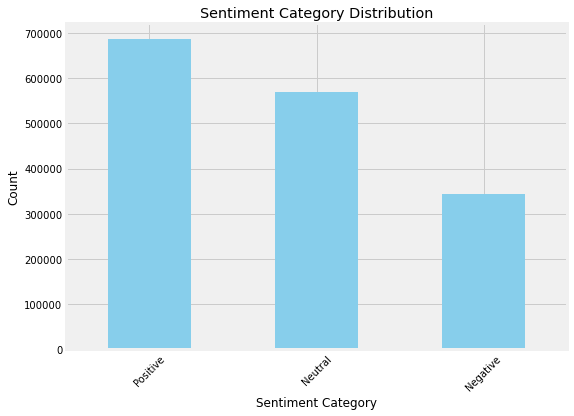

In [133]:
# Plotting the sentiment categories
plt.figure(figsize=(8, 6))
pandas_df['sentiment_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [94]:
# convert data 

In [95]:
#spark_df.show()
spark_df.select('Text', 'Date', 'analyze_sentiment', 'sentiment', 'sentiment_category').show()

+--------------------+--------------------+-----------------+-----------+------------------+
|                Text|                Date|analyze_sentiment|  sentiment|sentiment_category|
+--------------------+--------------------+-----------------+-----------+------------------+
|switchfoot httptw...|Mon Apr 06 22:19:...|          -0.0173|        0.2|          Positive|
|is upset that he ...|Mon Apr 06 22:19:...|            -0.75|        0.0|           Neutral|
|kenichan i dived ...|Mon Apr 06 22:19:...|           0.4939|        0.5|          Positive|
|my whole body fee...|Mon Apr 06 22:19:...|            -0.25|        0.2|          Positive|
|nationwideclass n...|Mon Apr 06 22:19:...|          -0.6597|     -0.625|          Negative|
|kwesidei not the ...|Mon Apr 06 22:20:...|              0.0|        0.2|          Positive|
|         need a hug |Mon Apr 06 22:20:...|           0.4767|        0.0|           Neutral|
|loltrish hey  lon...|Mon Apr 06 22:20:...|            0.745| 0.273333

In [96]:
# Splitting the 'Date' column and creating new columns for day, month, and year
spark_df = spark_df.withColumn('Day', substring('Date', 9, 3))
spark_df = spark_df.withColumn('Month', substring('Date', 5, 2))
spark_df = spark_df.withColumn('Year', substring('Date', -4, 4))

In [97]:
#Converting month abbreviation to numeric representation using 'when' statement
spark_df = spark_df.withColumn('Month_Num',
    when(col('Month') == 'Jan', '01')
    .when(col('Month') == 'Feb', '02')
    .when(col('Month') == 'Mar', '03')
    .when(col('Month') == 'Apr', '04')
    .when(col('Month') == 'May', '05')
    .when(col('Month') == 'Jun', '06')
    .when(col('Month') == 'Jul', '07')
    .when(col('Month') == 'Aug', '08')
    .when(col('Month') == 'Sep', '09')
    .when(col('Month') == 'Oct', '10')
    .when(col('Month') == 'Nov', '11')
    .when(col('Month') == 'Dec', '12')
)

In [98]:
# Creating a new date column in the format 'yyyy-MM-dd HH:mm:ss' by concatenating the columns
spark_df = spark_df.withColumn('New_Date',
    concat(col('Year'), lit('-'), col('Month_Num'), lit('-'), col('Day'), lit(' '), substring('Date', 12, 8))
)


In [99]:
# Converting month abbreviation to numeric representation
month_dict = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
              'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

In [100]:
#Define a funtion
def map_month(month):
    return month_dict.get(month, None)

In [101]:
# Create a UDF
map_month_udf = udf(map_month, IntegerType())

In [102]:
# Converting month to numeric representation
#for month, month_num in month_dict.items():
#    spark_df = spark_df.withColumn('Month_Num', when(col('Month') == month, month_num))

In [103]:
for month, month_num in month_dict.items():
    spark_df = spark_df.withColumn('Month_Num', when(col('Month') == month, month_num).otherwise(col('Month_Num')))

In [104]:
# Creating a new date column in the format 'yyyy-MM-dd HH:mm:ss' by concatenating the columns
spark_df = spark_df.withColumn('New_Date',
    concat(col('Year'), lit('-'), col('Month_Num'), lit('-'), col('Day'), lit(' '), substring('Date', 12, 8))
)                               

In [105]:
spark_df = spark_df.withColumn('Month_Num', map_month_udf(col('Month')))

#                               when(col('Month').isin(list(month_dict.keys())), 
 #                                   month_dict[col('Month')]).otherwise(None))

In [106]:
# Show the DataFrame with the new 'New_Date' column
spark_df.select('Text', 'Date', 'sentiment', 'sentiment_category', 'Day', 'Month', 'Year').show()

+--------------------+--------------------+-----------+------------------+---+-----+----+
|                Text|                Date|  sentiment|sentiment_category|Day|Month|Year|
+--------------------+--------------------+-----------+------------------+---+-----+----+
|switchfoot httptw...|Mon Apr 06 22:19:...|        0.2|          Positive|06 |   Ap|2009|
|is upset that he ...|Mon Apr 06 22:19:...|        0.0|           Neutral|06 |   Ap|2009|
|kenichan i dived ...|Mon Apr 06 22:19:...|        0.5|          Positive|06 |   Ap|2009|
|my whole body fee...|Mon Apr 06 22:19:...|        0.2|          Positive|06 |   Ap|2009|
|nationwideclass n...|Mon Apr 06 22:19:...|     -0.625|          Negative|06 |   Ap|2009|
|kwesidei not the ...|Mon Apr 06 22:20:...|        0.2|          Positive|06 |   Ap|2009|
|         need a hug |Mon Apr 06 22:20:...|        0.0|           Neutral|06 |   Ap|2009|
|loltrish hey  lon...|Mon Apr 06 22:20:...| 0.27333334|          Positive|06 |   Ap|2009|
|tatiana_k

In [107]:
# Date:show only the days 06= represent de day of the month
spark_df.select('Day', 'Month', 'Year').distinct().show(truncate=False)

+---+-----+----+
|Day|Month|Year|
+---+-----+----+
|21 |Ap   |2009|
|24 |Ju   |2009|
|19 |Ju   |2009|
|06 |Ju   |2009|
|03 |Ma   |2009|
|11 |Ma   |2009|
|18 |Ma   |2009|
|28 |Ma   |2009|
|27 |Ma   |2009|
|02 |Ju   |2009|
|02 |Ma   |2009|
|13 |Ma   |2009|
|09 |Ma   |2009|
|26 |Ma   |2009|
|17 |Ju   |2009|
|20 |Ju   |2009|
|21 |Ma   |2009|
|17 |Ap   |2009|
|20 |Ap   |2009|
|31 |Ma   |2009|
+---+-----+----+
only showing top 20 rows



In [108]:
# Concat columns
spark_df = spark_df.withColumn('Full_Date', concat(col('Year'), col('Month'), col('Day')))

In [109]:
# Date:new cariable
spark_df.select('Day', 'Month', 'Year', 'Full_Date').distinct().show(truncate=False)

+---+-----+----+---------+
|Day|Month|Year|Full_Date|
+---+-----+----+---------+
|18 |Ap   |2009|2009Ap18 |
|05 |Ju   |2009|2009Ju05 |
|19 |Ap   |2009|2009Ap19 |
|09 |Ma   |2009|2009Ma09 |
|21 |Ap   |2009|2009Ap21 |
|29 |Ma   |2009|2009Ma29 |
|07 |Ju   |2009|2009Ju07 |
|25 |Ma   |2009|2009Ma25 |
|21 |Ma   |2009|2009Ma21 |
|31 |Ma   |2009|2009Ma31 |
|23 |Ju   |2009|2009Ju23 |
|22 |Ju   |2009|2009Ju22 |
|27 |Ma   |2009|2009Ma27 |
|01 |Ma   |2009|2009Ma01 |
|16 |Ma   |2009|2009Ma16 |
|10 |Ma   |2009|2009Ma10 |
|18 |Ma   |2009|2009Ma18 |
|23 |Ma   |2009|2009Ma23 |
|04 |Ju   |2009|2009Ju04 |
|14 |Ju   |2009|2009Ju14 |
+---+-----+----+---------+
only showing top 20 rows



In [110]:
spark_df.select('Text', 'Full_Date', 'sentiment', 'sentiment_category', 'Day', 'Month', 'Year').show()

+--------------------+---------+-----------+------------------+---+-----+----+
|                Text|Full_Date|  sentiment|sentiment_category|Day|Month|Year|
+--------------------+---------+-----------+------------------+---+-----+----+
|switchfoot httptw...|2009Ap06 |        0.2|          Positive|06 |   Ap|2009|
|is upset that he ...|2009Ap06 |        0.0|           Neutral|06 |   Ap|2009|
|kenichan i dived ...|2009Ap06 |        0.5|          Positive|06 |   Ap|2009|
|my whole body fee...|2009Ap06 |        0.2|          Positive|06 |   Ap|2009|
|nationwideclass n...|2009Ap06 |     -0.625|          Negative|06 |   Ap|2009|
|kwesidei not the ...|2009Ap06 |        0.2|          Positive|06 |   Ap|2009|
|         need a hug |2009Ap06 |        0.0|           Neutral|06 |   Ap|2009|
|loltrish hey  lon...|2009Ap06 | 0.27333334|          Positive|06 |   Ap|2009|
|tatiana_k nope th...|2009Ap06 |        0.0|           Neutral|06 |   Ap|2009|
|twittera que me m...|2009Ap06 |        0.0|        

In [115]:
#Mapping of month abbreviations to full month names
month_mapping = {
    'Ap': 'April',
    'Ma': 'May',
    'Ju': 'June'
}

In [127]:
# Define a UDF (User Defined Function) to map months
def map_month(month):
    return month_mapping.get(month, month)

# Apply the UDF to create a new column 'Full_Month'
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

map_month_udf = udf(map_month, StringType())
spark_df = spark_df.withColumn('Full_Month', map_month_udf('Month'))

In [129]:
# Concatenate the columns to create 'Full_Date'
spark_df = spark_df.withColumn('Full_Date', concat_ws('-', 'Year', 'Full_Month', 'Day'))

In [130]:
# Find the first day (minimum date) and last day (maximum date) in the 'Full_Date' column
first_day = spark_df.select(min(col('Full_Date')).alias('min_date')).collect()[0]['min_date']
last_day = spark_df.select(max(col('Full_Date')).alias('max_date')).collect()[0]['max_date']


In [131]:
# Display the first and last day
print("First day in the column 'Full_Date':", first_day)
print("Last day in the column 'Full_Date':", last_day)

First day in the column 'Full_Date': 2009-April-06 
Last day in the column 'Full_Date': 2009-May-31 


In [ ]:


# Concatenate the columns to create 'Full_Date'
spark_df = spark_df.withColumn('Full_Date', concat_ws('-', 'Year', 'Full_Month', 'Day'))

# Find the first day (minimum date) and last day (maximum date) in the 'Full_Date' column
first_day = spark_df.select(min(col('Full_Date')).alias('min_date')).collect()[0]['min_date']
last_day = spark_df.select(max(col('Full_Date')).alias('max_date')).collect()[0]['max_date']

# Display the first and last day
print("First day in the column 'Full_Date':", first_day)
print("Last day in the column 'Full_Date':", last_day)




In [ ]:
# convert the pyspark DataFrame 
spark_df = spark_df.select('Text', 'User', 'Ful_Date', 'sentiment', 'sentiment_category', 'Day', 'Month', 'Year')

In [ ]:
#pandas_df = spark_df.toPandas()

In [ ]:
#Display the DataFrame

spark_df.select('Day', 'Month', 'Year', 'Full_Date').distinct().show(truncate=False)

In [ ]:
spark_df.select('Text', 'sentiment', 'Full_Date').distinct().show(truncate=False)

In [ ]:
spark_df = spark_df.select("Text", col("sentiment").cast("Int").alias("label"))
spark_df.show(truncate=False, n=5)

In [ ]:
#Divide data,70% for training, 30% for testing
dividedData = spark_df.randomSplit([0.7, 0.3])
trainingData = dividedData[0] # index 0 = data training
testingData = dividedData[1] #index 1  = data testing
train_rows = trainindData.count()
test_rows = testingData.count()
print ("Training data rows:", train_rows, "; Testing data row:", test_rows)

In [ ]:
spark_df = spark_df.withColumn('Date', to_date('Date'))

In [ ]:
spark_df = spark_df.selectExport('Date as ds', 'Sentimment as y')

In [ ]:
tokenizer = tokenizer(inputCol="Text", outputCol="Sentiment_Text")
#tokenizerTrain = tokenizer.transform(trainingData)
tokenizerTrain.show(truncate=False, n=5)

In [ ]:
#Data processing sentiment.....later   using Spark

In [ ]:
#sentiment_count = spark_df['Text'].value_counts()
#sentiment_count = spark_df.groupBy['Text'].count().alias("count")
#sentiment_count = spark_df.groupBy['Text'].agg(count("*").alias("count"))

In [ ]:
#######################################################

In [ ]:
#spark = SparkSession.builder.appName("AverageWordLength").getOrCreate()

In [ ]:
# define 

In [ ]:
#def avg_word(sentence):
#    words = sentence.split()
#    return sum(len(word) for word in words) / len(words)

In [ ]:
#avg_word_udf = udf(avg_word, DoubleType())

In [ ]:
#spark_df.withColumn("average_word_length", avg_word_udf(col("Sentiment")))

In [ ]:
#selected_columns = spark_df.select("Sentiment", "average_word_length")

In [ ]:
#selected_columns.show()

In [ ]:
#Tweets.show() 

In [ ]:
#**************************************************************

In [ ]:
#spark_df = spark.createDataFrame(Tweets)

In [ ]:
#def avg_word(sentence):
#    words = sentence.split()
#    return sum(len(word) for word in words) / len(words)

In [ ]:
#avg_word_udf = udf(avg_word, DoubleType())

In [ ]:
#Tweets_df  = Tweets_df .withColumn("average_word_length", avg_word_udf(col("_6")))

In [ ]:
#Tweets_df.show()

In [ ]:
#Schema for the  DataFrame
#schema = StructType([StructField("sentence", StringType(), True)])

In [ ]:
#  Crate a DataFrame

In [ ]:
#Tweets = [("Text",)]
#df = spark.createDataFrame(Tweets, schema)

In [ ]:
#Split the sentence

In [ ]:
#df =df.withColumn("words", split(col("sentence"), " "))
#df =df.withColumn("words_lengths", size(col("words")))

In [ ]:
# Calcul the average word length

In [ ]:
#avg_word_length = df.select(sum(col("word_lengths")).alias("total_length")).collect()[0]["total_length"] / df.count()

In [ ]:
#print(f"Average word length: {avg_word_length}")

In [ ]:
################################################################

In [ ]:
#spark = SparkSession.builder.appName("AverageWordLength").getOrCreate()

In [ ]:
#def avg_word(sentence):
#    words = sentence.split()
#    return sum(len(word) for word in words) / len(words)

In [ ]:
#avg_word_udf = udf(avg_word, DoubleType())

In [ ]:
#spark_df = spark_df.withColumn("average_word_length", avg_word_udf(col("Text")))

In [ ]:
#spark_df ["avg_word"] = spark_df ["Text"].apply(lambda x : avg_word(x))

In [ ]:
#avg_word_udf = udf(lambda sentence: avg_word(sentence), DoubleType())

In [ ]:
#Tweets = Tweets.withColumn("average_word_length", avg_word_udf(col("Text")))

In [ ]:
#Tweets.show()

In [ ]:
#****************************************************************************************************************
#*                                        S T R E M M I N G                                                     *
#****************************************************************************************************************

In [ ]:
st = PorterStemmer()

In [ ]:
# Define a Udf for Stremming

In [ ]:
def stem_text(text):
    stemmer = SnowballStemmer("english")
    words = nltk.word_tokenize(Text)
    stemmer_words = [stemmer.stem(word) for word in words]
    return " ".join(stemmed_words)

In [ ]:
# Register the UDF

In [ ]:
strem_udf = udf(stem_text, StringType())

In [ ]:
#Create a Spark session

In [ ]:
spark = SparkSession.builder.appName("StemmingExample").getOrCreate()


In [ ]:
#DataFrame 

In [ ]:
#spark_stemmed = spark_df.withColumn("Stemmed_Text", strem_udf(spark_df["Text"]))

In [ ]:
# Show te resulting DataFrame

In [ ]:
#spark_stemmed.show(truncate=False)

In [ ]:
#Data Procesising in panda

In [ ]:
Tweets_df = spark.read.csv("file:///home/hduser/Documents/CA2/Header_Proj_Tweets.csv", header=True, inferSchema = True)

In [ ]:
Tweets_df = Tweets_df.withColumn("Text", lower(Tweets_df["text"]))


In [ ]:
Tweets_df = Tweets_df.withColumn("Text", regexp_replace(Tweets_df["text"], "[^a-z0-9\\s]", ""))

In [ ]:
print(Tweets_df.columns)

In [ ]:
cols = ['Ids', 'date', 'User', 'Text']

In [ ]:
sns.set(style="darkgrid")

In [ ]:
sns.pairplot (Tweets_df[cols], heigt=2.5)

In [ ]:
df = df.withColumn("Text", lower(df["text"]))
df = df.withColumn("Text", regexp_replace(df["text"], "[^a-z0-9\\s]", ""))

In [ ]:
rows_df.shape

In [ ]:
# some excercises, it didn't work to me

In [ ]:
#header = tweets.first()

#tweets = tweets.filter(lambda row: row != header) 
#tweets = tweets.map(lambda row: [int(elem) for elem in row.split(',')])

In [ ]:
#tweets = sc.textFile("Tweets_path ")
#Header = tweets.first()

#tweets = tweets.filter(lambda row: row != header) 
#tweets = tweets.map(lambda row: [int(elem) for elem in row.split(',')])

In [ ]:
# creating the schema for my DataFrame
# was one  error because i didn' import pyspark.sql.types as typ
# but next did it, the command worked, great!

In [ ]:
#fields = [
#    *[
#        typ.StructField(h[1:-1], typ.IntegerType(), True)
#        for h in header.split(',')
#    ]
#]
#schema = typ.StructType(fields)

In [ ]:
# First put the Titles to see better

In [ ]:
#column_names  = ['_c0','Ids', 'Date', 'Flag', 'User', 'Text']    
#full_df = pd.read_csv('file:///home/hduser/Documents/CA2/ProjectTweets.csv', header=None, names=column_names)

In [ ]:
# rename the file whit  row's title  ******* ******* ****** ******* ****** ********

In [ ]:
#spark_df = "Title_pro_Tweets.csv"
#Check if the file already Exists
#if not os.path.exists("Title_pro_Tweets.csv"):
    #perform DataFrame operaction and save the file
#   spark_df.write.csv("file:///home/hduser/Documents/CA2/Title_pro_Tweets.csv", header=True)
#else:
#    print("file already exists. No need to save it again.")

In [ ]:
#schema = StructType().add("_c0","integer").add("Ids","integer").add("Date","string").add("Flag", "string").add("User",'string').add("Text", "string")

In [ ]:
#Schema for the  DataFrame
#schema = StructType([StructField("sentence", StringType(), True)]